In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
redwinedata = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep = None)
ones = pd.DataFrame(np.ones((len(redwinedata), 1)), columns=['class'])
red_data = pd.concat((redwinedata, ones), axis=1)

whitewinedata = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep = None)
zeros = pd.DataFrame(np.zeros((len(whitewinedata), 1)), columns=['class'])
white_data = pd.concat((whitewinedata, zeros), axis=1)

print(len(red_data))
print(len(white_data))

/Users/Cam/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


1599
4898


/Users/Cam/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  """


In [4]:
data = red_data.append(white_data)
data

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
4893                 24.0                  92.0  0.99114  3.27       0.50   
4894                 57.0                 168.0  0.99490  3.15       0.46   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  class  
0         9.4        5    1.0  
1         9.8        5    1.0  
2         9.8        5    1.0  
3         9.8        6    1.0  
4         9.4        5    1.0  
...       ...      ...    ...  
4893     11.2        6    0.0  
4894      9.6        5    0.0  
4895      9.4        6    0.0  
4896     12.8        7    0.0  
4897     11.8        6    0.0  

[6497 rows x 13 columns]

In [5]:
y = data.iloc[0:5000, 12].values

y = np.where(y > 0, 1, -1)
# every element in our array that is red wine (class=1), set it to 1, otherwise -1

X = data.iloc[0:5000, 0:11].values
# this is now extracting the features which are column . and .

y

array([ 1,  1,  1, ..., -1, -1, -1])

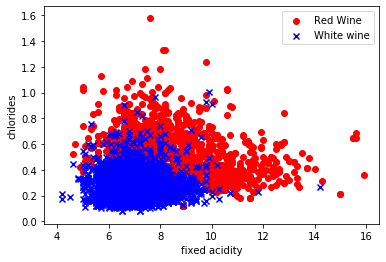

In [6]:
%matplotlib inline

plt.scatter(X[:1599, 0], X[:1599, 1], c='r', marker='o', label='Red Wine')
# first 1599 values in first feature and second feature = red
plt.scatter(X[1600:5000, 0], X[1600:5000, 1], c='b', marker='x', label='White wine')
# values 1600-5000 = white

plt.xlabel('fixed acidity')
plt.ylabel('chlorides')

plt.legend()

plt.show()

In [7]:
X = X / np.linalg.norm(X)
# X over the norm of X - changing the scale to unit length

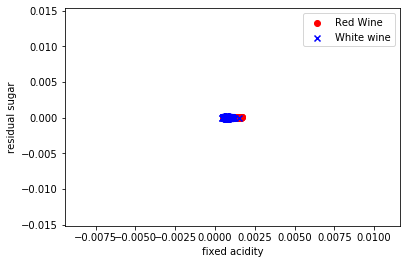

In [8]:
plt.scatter(X[:1599, 0], X[:1599, 1], c='r', marker='o', label='Red Wine')
# first 1599 values in first feature and second feature = red
plt.scatter(X[1600:5000, 0], X[1600:5000, 1], c='b', marker='x', label='White wine')
# values 1600-5000 = white

plt.xlabel('fixed acidity')
plt.ylabel('residual sugar')

plt.legend()

plt.show()

In [40]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=42, test_size=0.25)
clf = MLPClassifier(random_state=42, max_iter=400).fit(X_train, y_train)
clf

MLPClassifier(max_iter=400, random_state=42)

In [41]:
clf.predict_proba(X_test[:])

array([[0.33462999, 0.66537001],
       [0.99460018, 0.00539982],
       [0.24770677, 0.75229323],
       ...,
       [0.86769395, 0.13230605],
       [0.98161433, 0.01838567],
       [0.99635203, 0.00364797]])

In [42]:
clf.predict(X_test[:, :])

array([ 1, -1,  1, ..., -1, -1, -1])

In [43]:
clf.score(X_test, y_test)

0.9024